# Tree-based Approaches on Boston Housing Data 

In [1]:
require(data.table, quietly = TRUE)
require(openxlsx, quietly = TRUE)
require(rpart, quietly = TRUE)
require(rattle, quietly = TRUE)
data_path='/home/baydogan/Courses/Şişecam/data/housingdata.xlsx'

data=data.table(read.xlsx(data_path,sheet='data'))
head(data,10)

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



CRIM    ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1  0.00632 18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2  0.02731  0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3  0.02729  0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4  0.03237  0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5  0.06905  0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6  0.02985  0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7  0.08829 12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8  0.14455 12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9  0.21124 12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10 0.17004 12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    386.71
   LSTAT MEDV
1   4.98 24.0
2   9.14 21.6
3   4.03 34.7
4   2.94 33.4
5   5.33 36.2
6   5.21 28.7
7  12.43 22.9
8  19.15 27.1
9  29.93 16.5
10 17.10 18.9

In [2]:
classification_data=copy(data)
classification_data[,is_expensive:=as.numeric(MEDV>quantile(MEDV,0.5))]
classification_data[,MEDV:=NULL]
head(classification_data,10)

CRIM    ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1  0.00632 18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2  0.02731  0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3  0.02729  0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4  0.03237  0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5  0.06905  0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6  0.02985  0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7  0.08829 12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8  0.14455 12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9  0.21124 12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10 0.17004 12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    386.71
   LSTAT is_expensive
1   4.98 1           
2   9.14 1           
3   4.03 1           
4   2.94 1           
5   5.33 1           
6   5.21 1           
7  12.43 1           
8  19.15 1           
9  29.93 0           
10 17.10 0

# Regression Tree
We are going to fit a regression tree to predict MEDV

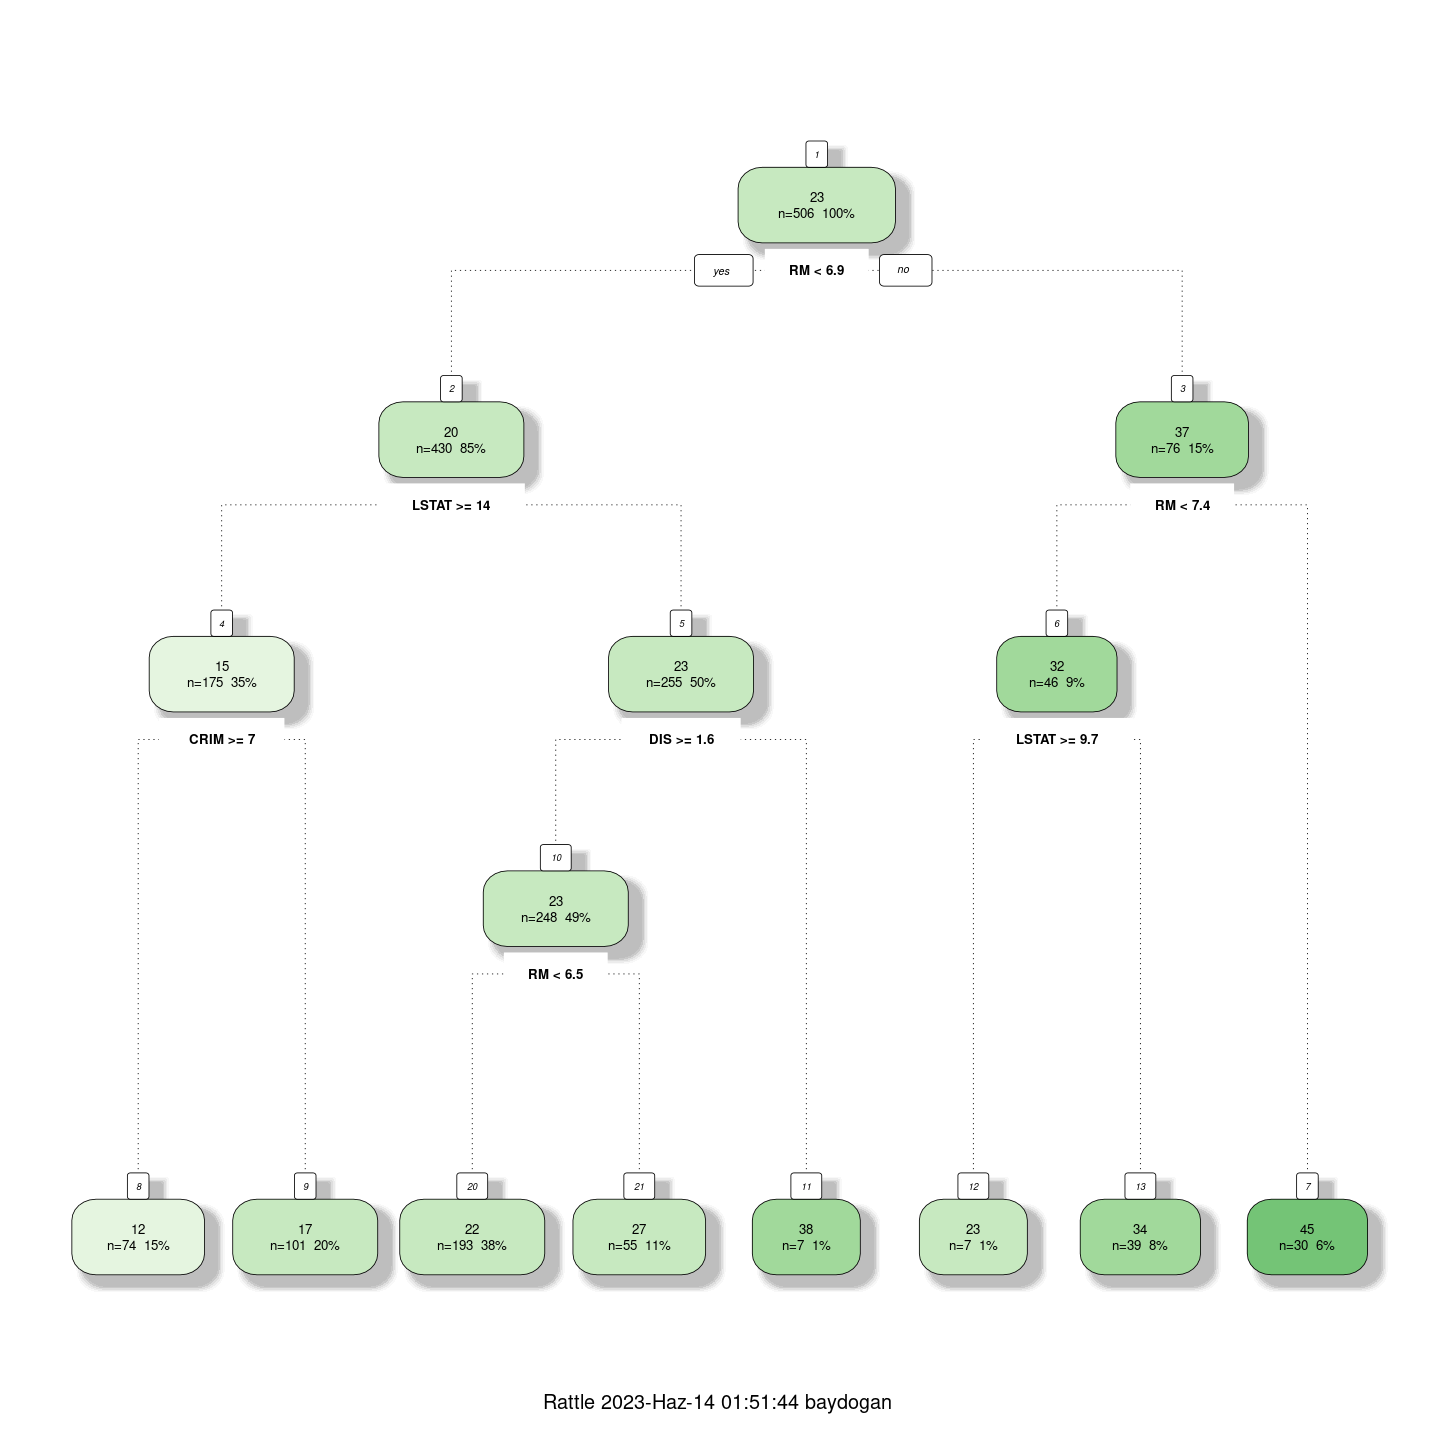

In [3]:
fit_rtree=rpart(MEDV~.,data,method='anova')
options(repr.plot.width=12, repr.plot.height=12)
fancyRpartPlot(fit_rtree)

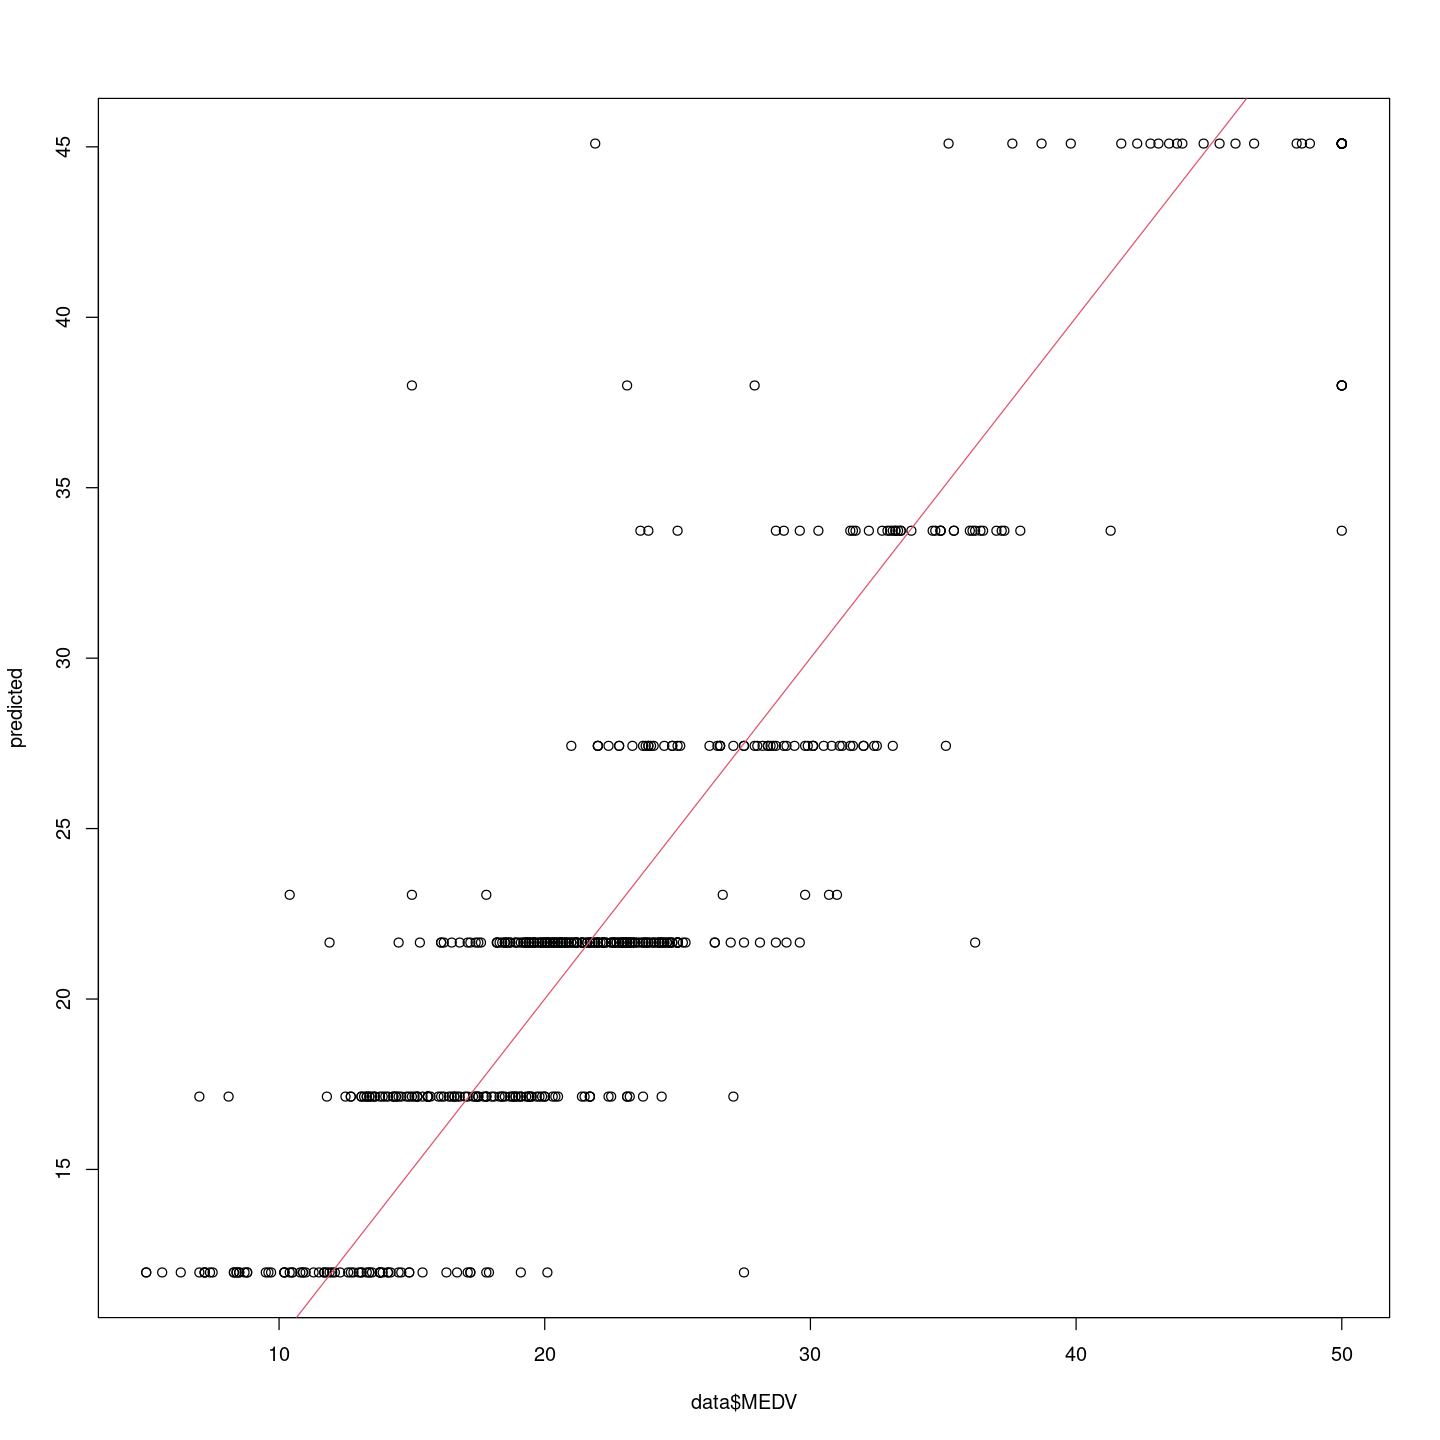

In [4]:
predicted=predict(fit_rtree,data)
plot(data$MEDV,predicted)
abline(a=0,b=1,col=2)

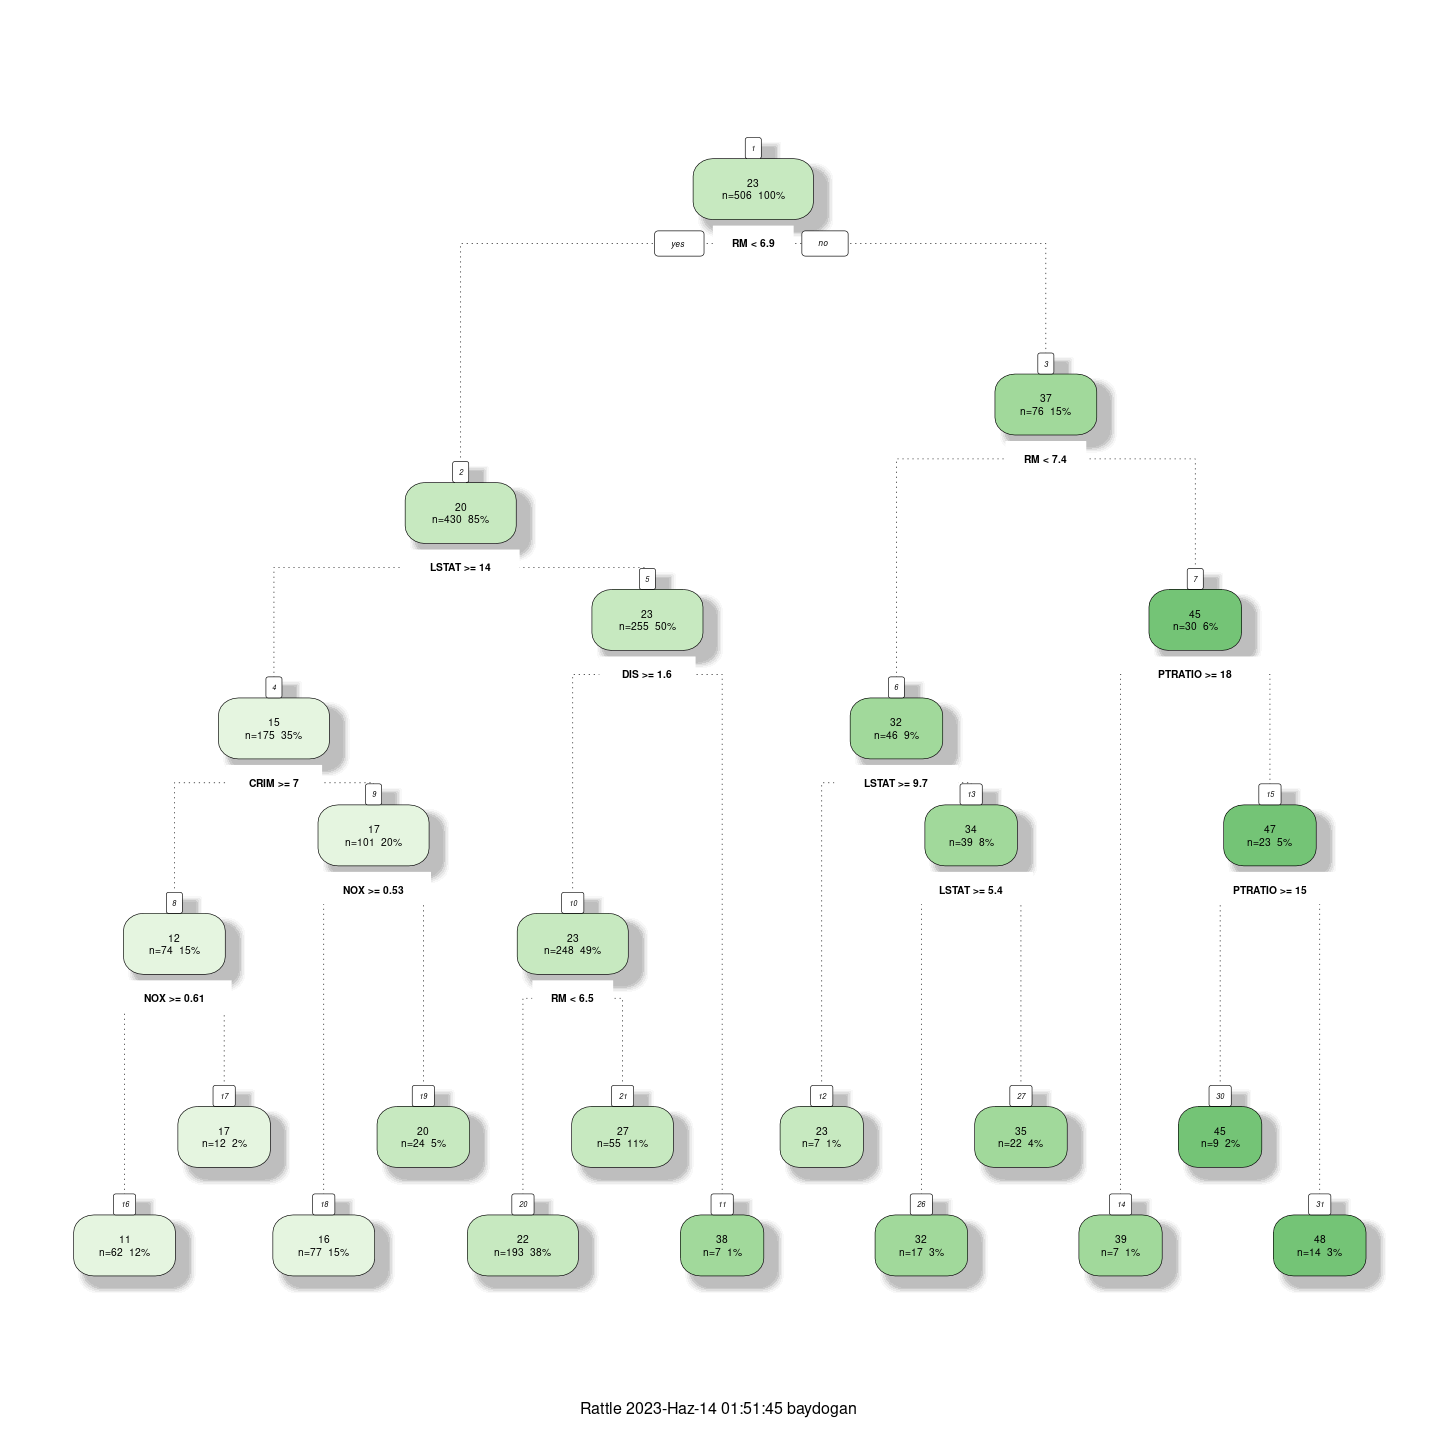

In [5]:
fit_rtree=rpart(MEDV~.,data,method='anova',control=rpart.control(cp=0,maxdepth=4))
fancyRpartPlot(fit_rtree)

In [6]:
summary(fit_rtree)

Call:
rpart(formula = MEDV ~ ., data = data, method = "anova", control = rpart.control(cp = 0, 
    maxdepth = 4))
  n= 506 

            CP nsplit rel error    xerror       xstd
1  0.452744201      0 1.0000000 1.0055009 0.08324660
2  0.171172436      1 0.5472558 0.6037463 0.05413014
3  0.071657841      2 0.3760834 0.3953472 0.04138536
4  0.036164281      3 0.3044255 0.3269008 0.03993883
5  0.033369230      4 0.2682612 0.3081227 0.04024039
6  0.026613000      5 0.2348920 0.2950625 0.03936733
7  0.015851157      6 0.2082790 0.2569412 0.03341620
8  0.008245448      7 0.1924279 0.2481661 0.03469471
9  0.007265385      8 0.1841824 0.2476636 0.03459673
10 0.006126335      9 0.1769170 0.2477902 0.03451066
11 0.003120649     10 0.1707907 0.2474029 0.03487967
12 0.001444036     11 0.1676700 0.2449842 0.03409751
13 0.000000000     12 0.1662260 0.2452476 0.03409707

Variable importance
     RM   LSTAT     DIS   INDUS     NOX PTRATIO     TAX     AGE    CRIM      ZN 
     32      20       8       

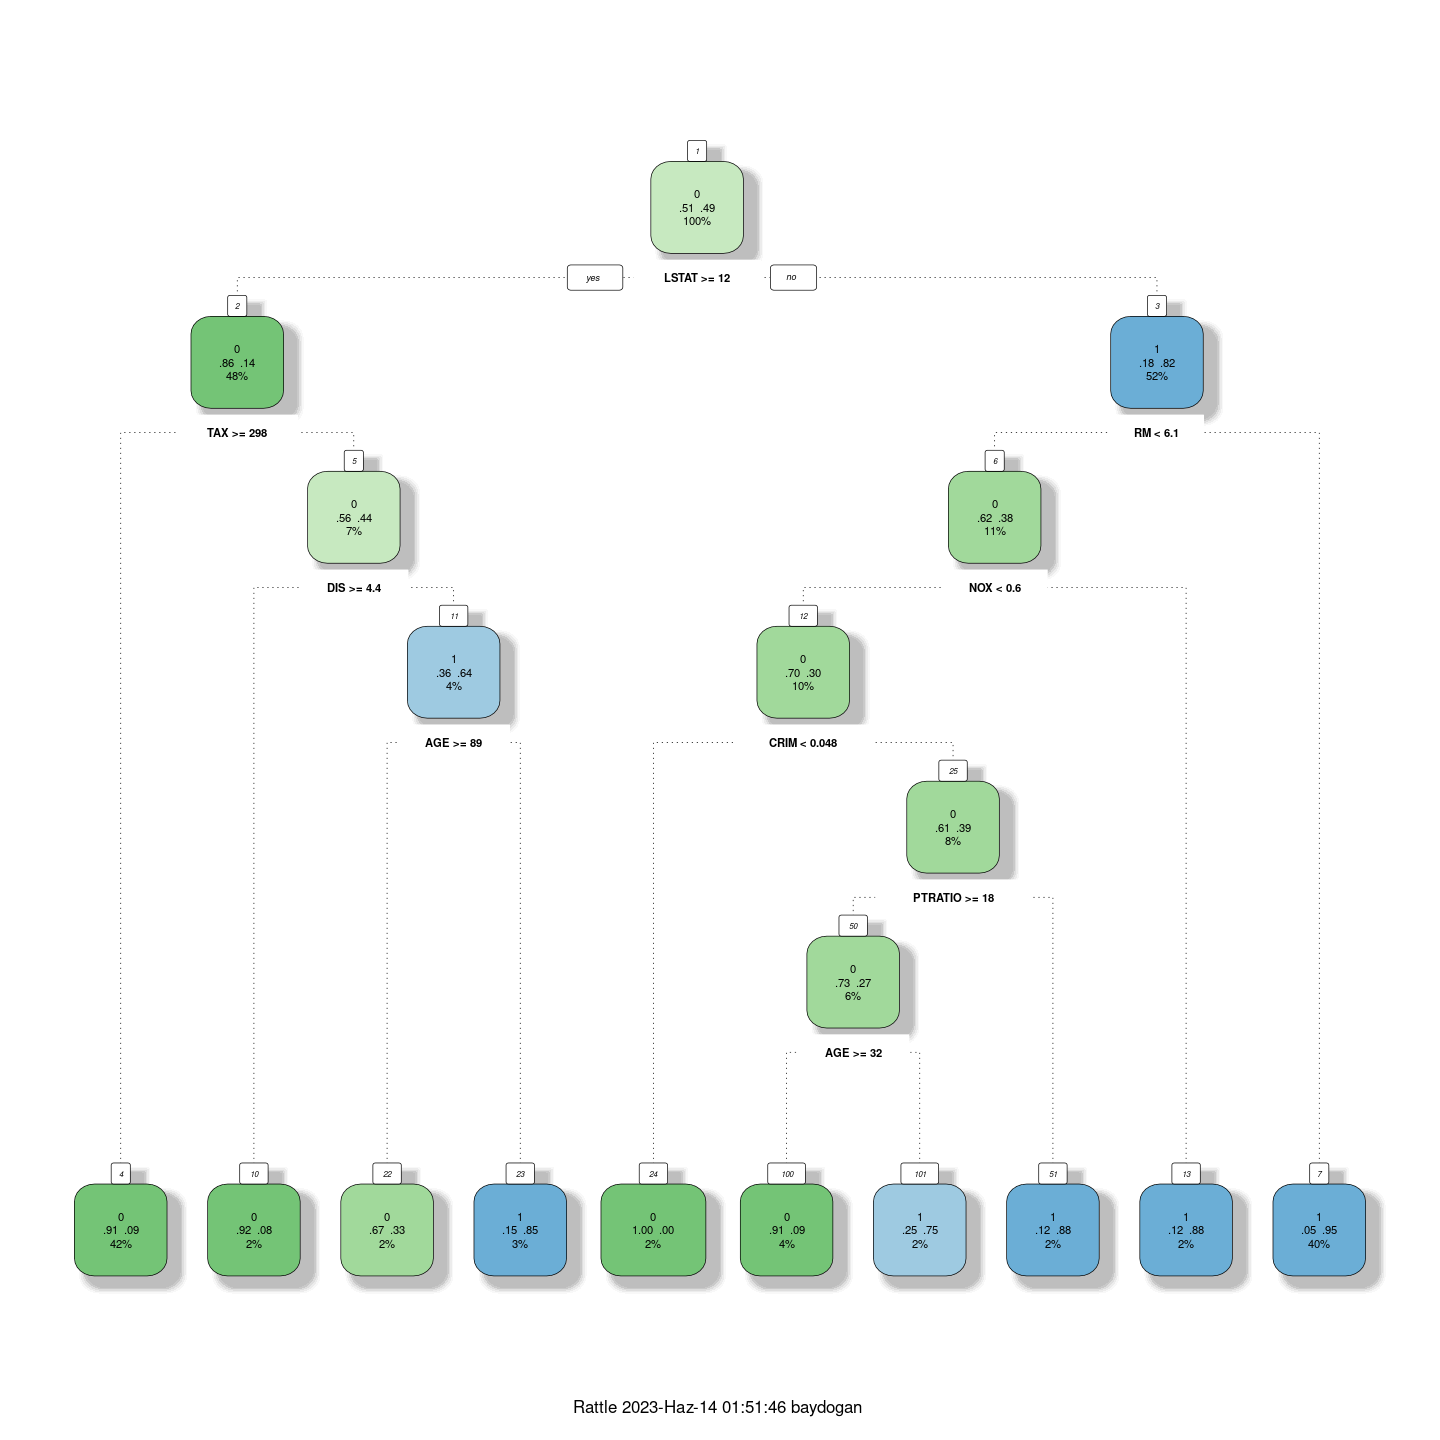

In [7]:
fit_cl_tree=rpart(is_expensive~.,classification_data,method='class')
fancyRpartPlot(fit_cl_tree)

In [8]:
summary(fit_cl_tree)

Call:
rpart(formula = is_expensive ~ ., data = classification_data, 
    method = "class")
  n= 506 

     CP nsplit rel error xerror       xstd
1 0.676      0     1.000  1.060 0.04493825
2 0.056      1     0.324  0.364 0.03455648
3 0.024      2     0.268  0.340 0.03363839
4 0.012      3     0.244  0.316 0.03265970
5 0.010      9     0.168  0.324 0.03299299

Variable importance
  LSTAT     NOX   INDUS     AGE     DIS     TAX      RM PTRATIO    CRIM     RAD 
     22      15      14      13      13      12       6       2       2       1 
     ZN 
      1 

Node number 1: 506 observations,    complexity param=0.676
  predicted class=0  expected loss=0.4940711  P(node) =1
    class counts:   256   250
   probabilities: 0.506 0.494 
  left son=2 (245 obs) right son=3 (261 obs)
  Primary splits:
      LSTAT   < 11.675   to the right, improve=117.17900, (0 missing)
      PTRATIO < 19.9     to the right, improve= 72.58058, (0 missing)
      NOX     < 0.5125   to the right, improve= 67.73183, 

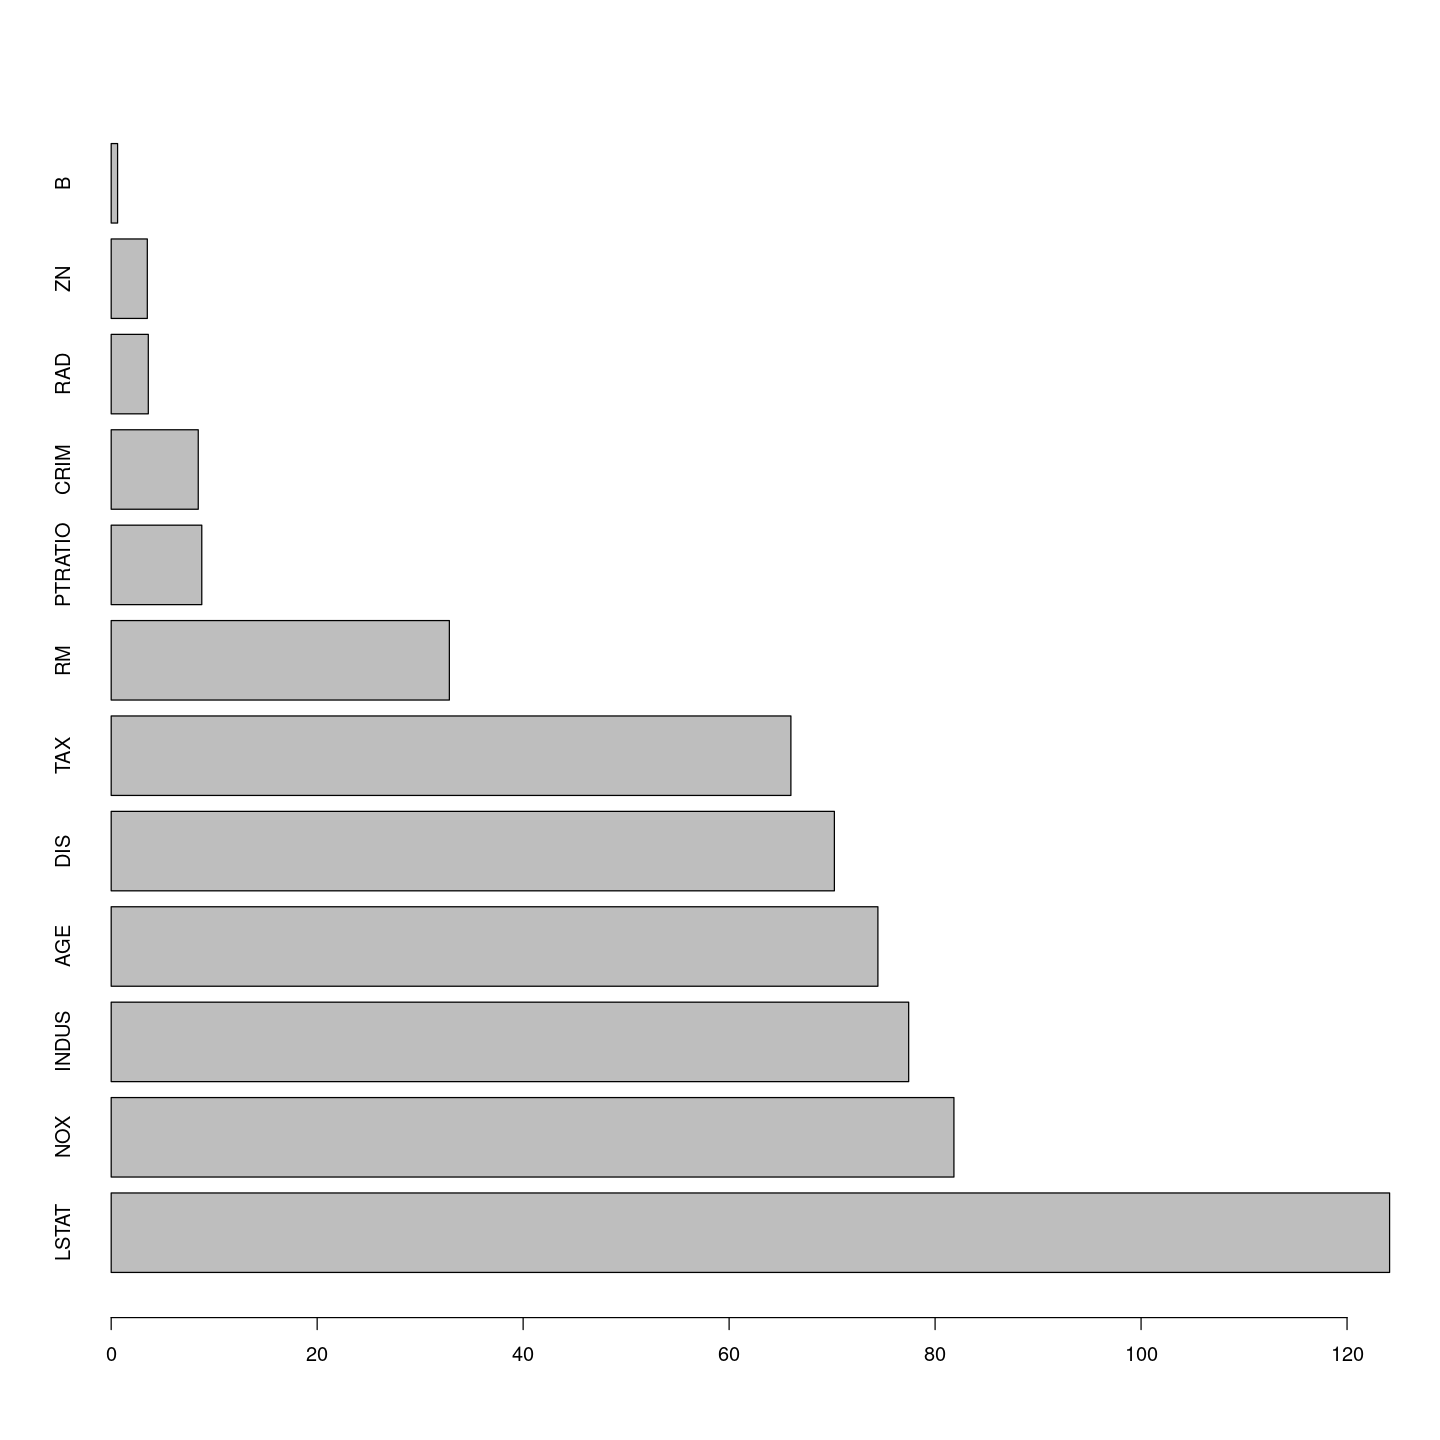

In [9]:
barplot(fit_cl_tree$variable.importance,horiz=T)